In [1]:
from src.utils.geo_utils import *
from src.utils.script import *
from src.utils.continents import *
from src.utils.who_data_handling import *
df = load_data()

### We will first do some analysis on our dataset

In [2]:
describe(df)

The 5 first rows of the data:
   BindingDB Reactant_set_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   

                                       Ligand SMILES  \
0  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...   
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...   
2  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...   
3  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...   
4  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...   

                                        Ligand InChI  \
0  InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...   
1  InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...   
2  InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...   
3  InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...   
4  InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...   

              Ligand InChI Key  BindingDB MonomerID  \
0  XGEGDSLAQZJGCW-HHGOQMMWSA-N               608

In [3]:
print(f'Number of ligands in the data: {len(ligands_counts(df))}')
print(f'Number of targets in the data: {len(target_counts(df))}')
print(f'Number of sources in the data: {len(target_source_counts(df))}')
print(f'Number of targets in the data that have a source: {len(targets_with_and_without_source(df)[0])}')
print(f"Number of targets in the data that don't have a source: {len(targets_with_and_without_source(df)[1])}")

Number of ligands in the data: 1277349
Number of targets in the data: 6716
Number of sources in the data: 329
Number of targets in the data that have a source: 3703
Number of targets in the data that don't have a source: 3013


In [4]:
print('Sources for the targets:')
for source in sorted(sources(df)) :
    print(source)

Sources for the targets:
Abelson murine leukemia virus
Acinetobacter baumannii
Acinetobacter genomosp. 3
Actinomadura sp. (strain R39)
Aedes aegypti
Aeromonas allosaccharophila
Aeromonas hydrophila
Agaricus bisporus
Agrobacterium sp. ZY-2006e
Alcaligenes sp. (strain DSM 11172)
Alicyclobacillus acidocaldarius
Amphiuma tridactylum
Anura
Apis mellifera
Aquifex aeolicus
Arabidopsis thaliana
Aspergillus aculeatus
Aspergillus fumigatiaffinis
Aspergillus niger
Aspergillus oryzae
Asterina pectinifera
Avian erythroblastosis virus (strain ES4)
Avian myeloblastosis virus
Avian sarcoma virus
Bacillus amyloliquefaciens
Bacillus anthracis
Bacillus cereus
Bacillus cereus (strain ATCC 14579 / DSM 31)
Bacillus clausii
Bacillus lentus
Bacillus licheniformis
Bacillus pasteurii
Bacillus sporothermodurans
Bacillus subtilis
Bacillus thermoproteolyticus
Bacteroides thetaiotaomicron
Bison bison
Bombyx mori
Borrelia burgdorferi
Bos taurus
Bovine viral diarrhea virus (strain CP7)
Brachyspira pilosicoli
Brassica

# Geographical Analysis

### Institution basic information

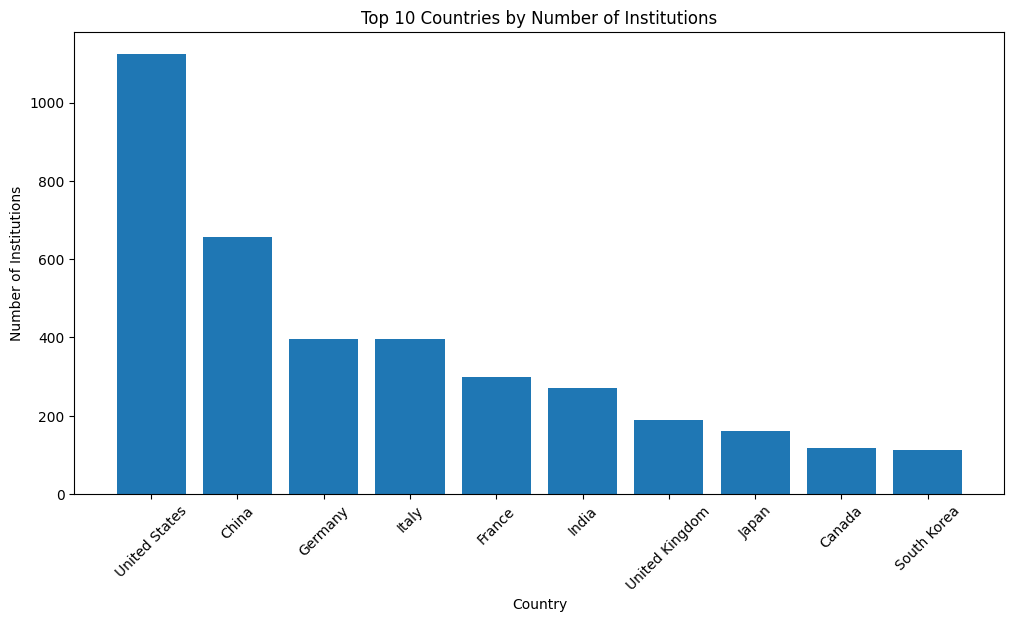

In [5]:
geodata = get_institution_locations(df) 
countries_with_most_institutions(geodata)

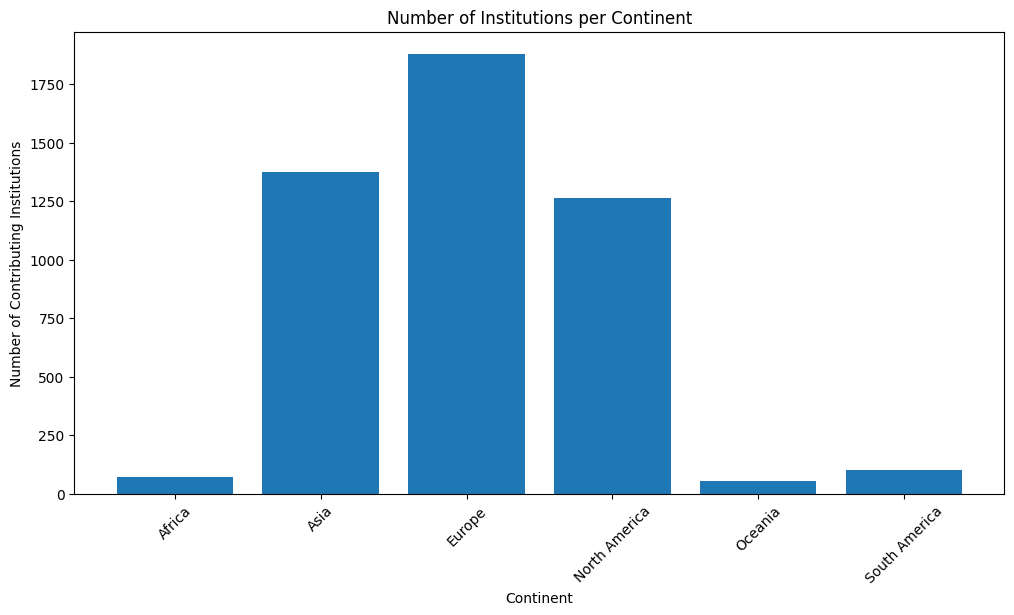

In [6]:


institutions_per_continent(geodata)

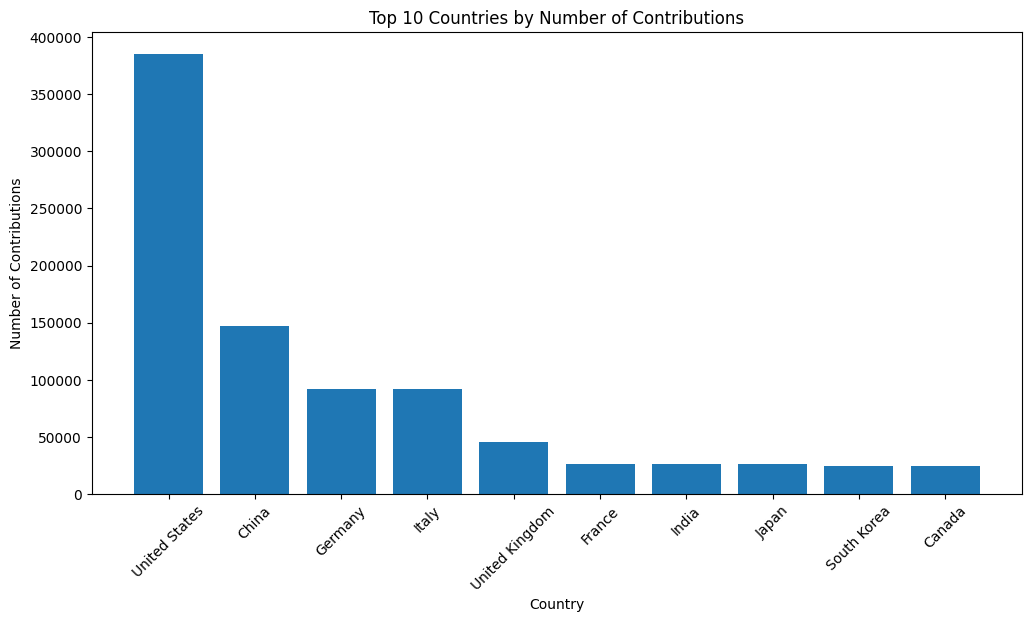

In [7]:

top_countries_bar_chart(geodata)

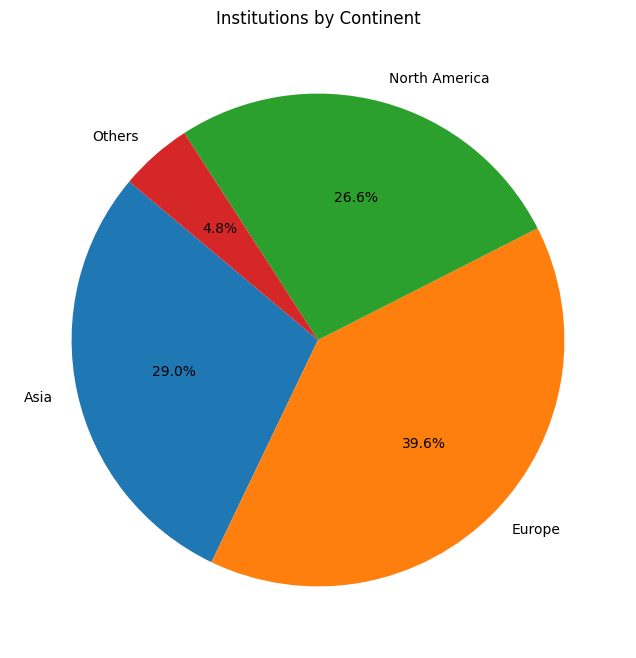

In [8]:
continents_pie_chart(geodata)

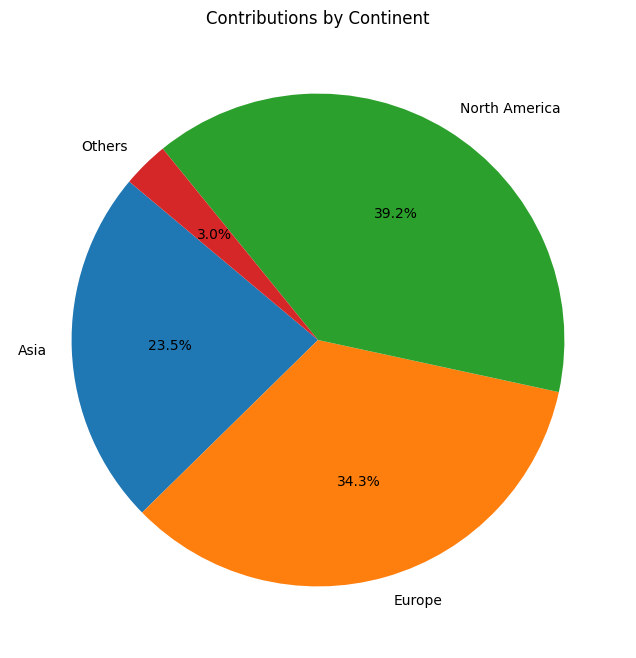

In [9]:

contribs_by_continents_pie(geodata)

### WHO DB diseases insights

To find data on diseases researched in experiments in the BindingDB dataset, we first made a list of all unique words used for target sources in BindingDB. Then we searched WHO's databases for these same words. After doing this we identified 7 diseases for which BindingDB has exepriment data for and WHO has data on their prevalences worldwide. We then used the prevalences data to calculate the number of people affected by each disease both in each country and in each region as defined by WHO. The heatmap shows the relative number of people affected by each disease in each region.

sa
  Cases  Plasmodium Falciparum  Human Immunodeficiency Virus  Poliovirus  \
0   AFR               1.000000                      1.000000    0.477391   
1   AMR               0.001762                      0.075094    0.039754   
2   EMR               0.015197                      0.003510    0.733954   
3   EUR               0.000000                      0.020658    0.000000   
4  SEAR               0.005722                      0.016239    1.000000   
5   WPR               0.001290                      0.000000    0.226965   

   Plasmodium vivax  Mycobacterium tuberculosis  Escherichia coli  \
0          0.962105                    1.000000          0.483086   
1          0.626407                    0.000000          0.000000   
2          1.000000                    0.097940          1.000000   
3          0.000000                    0.040462          0.473812   
4          0.460052                    0.014341          0.131197   
5          0.104409                    0.057329   

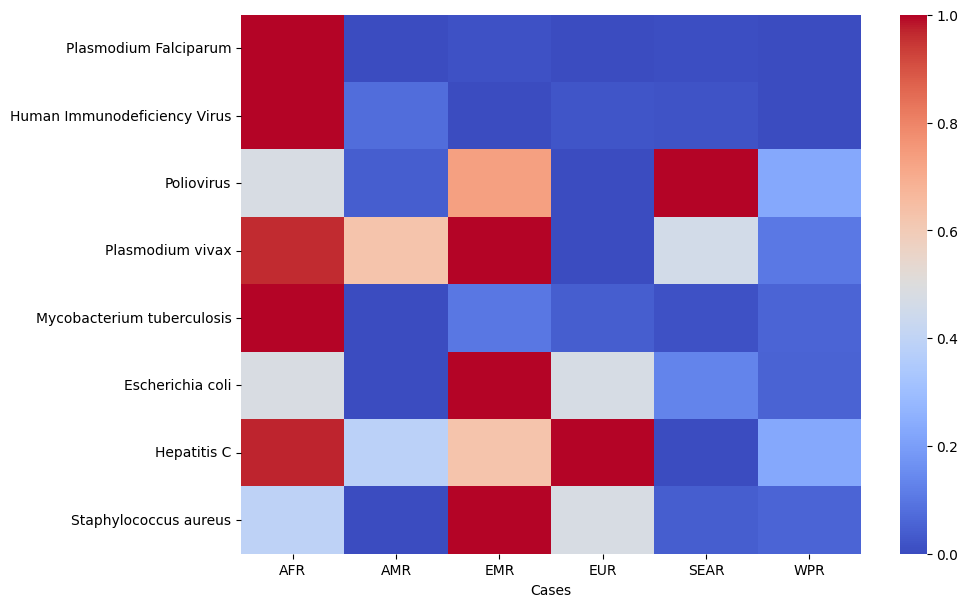

In [10]:
plot_who_heatmap()

### Target based insights

In [11]:
source_targets_map = targets_for_sources(df)

In [12]:
targets_with_multiple_sources(targets_with_and_without_source(df)[0],source_targets_map)

There are targets with multiple sources


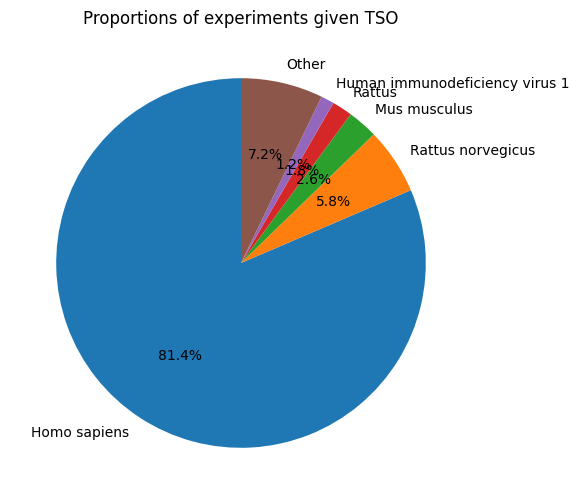

In [13]:
plot_proportions_of_experiments_given_TSO(df)

In [14]:
top_twenty_ligands_with_most_experiments = ligands_counts(df).index.tolist()[:20]
top_twenty_ligands_with_most_experiments_dict = {f'Lingand{i+1}': ligand for i, ligand in enumerate(top_twenty_ligands_with_most_experiments)}

In [15]:
top_twenty_targets_with_most_experiments = target_counts(df).index.tolist()[:20]

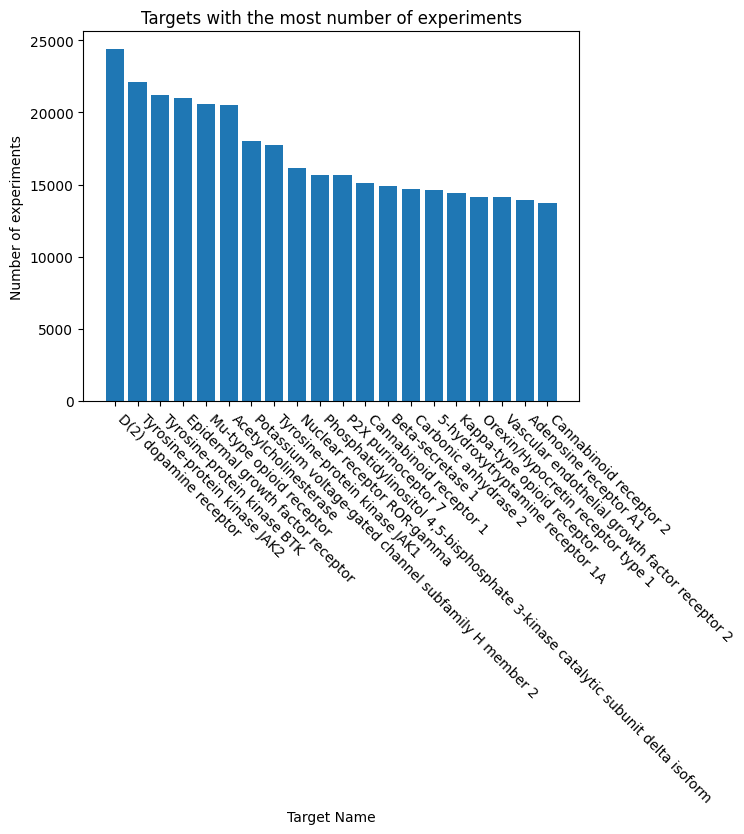

In [16]:
plt.bar(top_twenty_targets_with_most_experiments, target_counts(df)[:20])
plt.xticks(rotation=-45,ha='left')
plt.xlabel('Target Name')
plt.ylabel('Number of experiments')
plt.title('Targets with the most number of experiments')
plt.show()

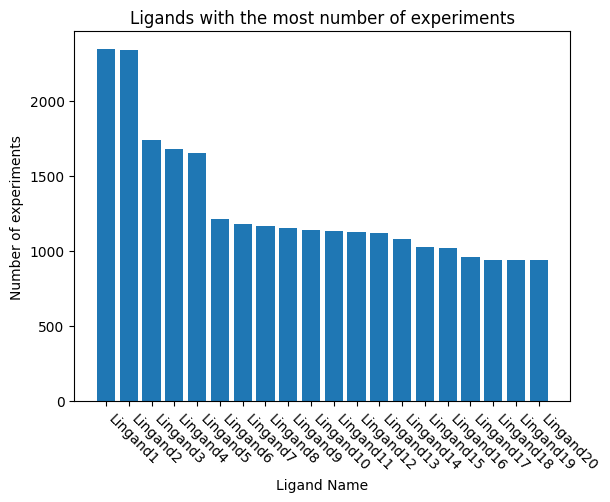

In [17]:
plt.bar(top_twenty_ligands_with_most_experiments_dict.keys(), ligands_counts(df)[:20])
plt.xticks(rotation=-45,ha='left')
plt.xlabel('Ligand Name')
plt.ylabel('Number of experiments')
plt.title('Ligands with the most number of experiments')
plt.show()

We chose to focus on these 8 major diseases : 

- HIV
- Tuberculosis
- Hepatitis C
- Plasmodium falciparum
- Poliovirus
- Staphylococcus aureus
- Escherichia coli
- Plasmodium vivax


For each disease, we look at how much research was done on it

In [18]:
import pickle
full_locations = pickle.load(open('src/data/full_institution_locations.pkl', 'rb'))

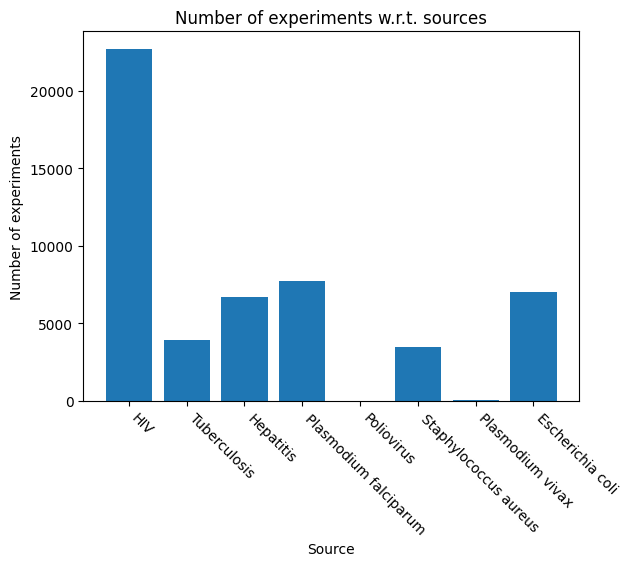

In [19]:
plot_Number_of_experiments_w_r_t_sources(df)

In [20]:
dx = df_institutions_target_country_region_WHO(df,full_locations)

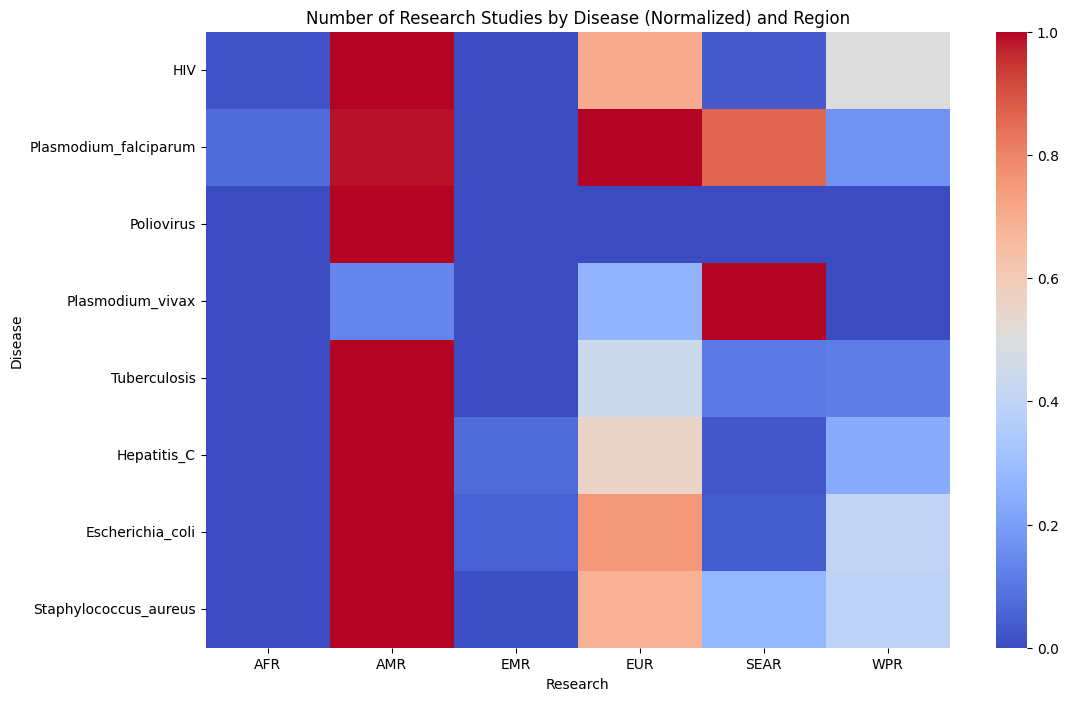

In [21]:
heatmap_research(dx)

In the following, we analyze the research trend on major diseases by comparing the number of experiments conducted across different countries and continents. For each disease, we visualize the leading countries/continents based on the amount of research conducted.

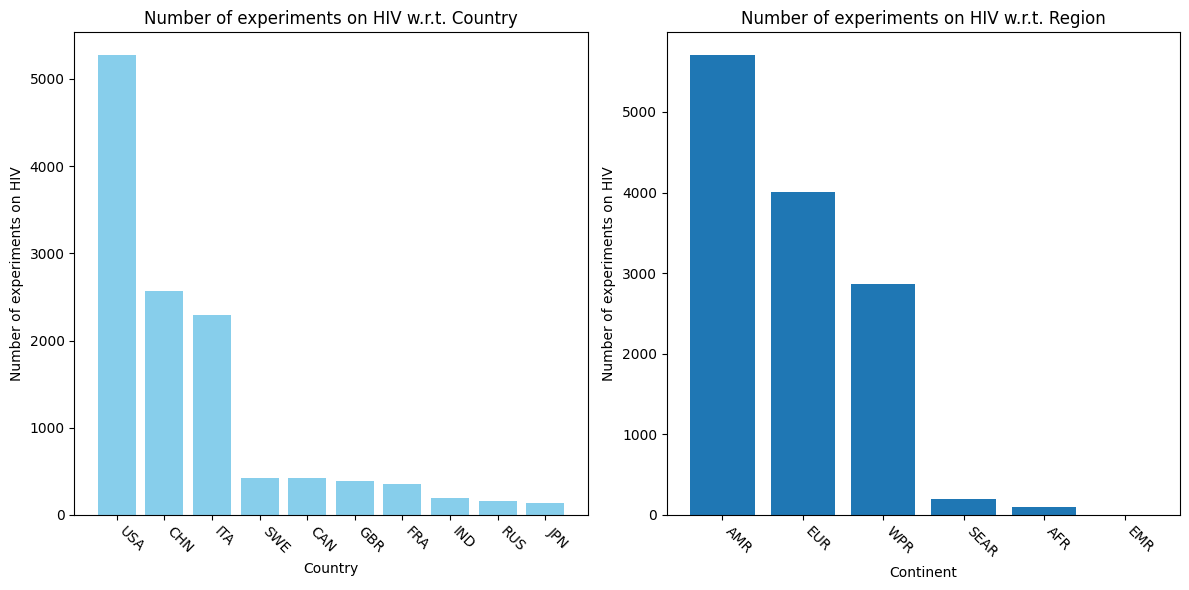

In [22]:
#HIV
plot_disease('HIV',dx, HIV_sources)

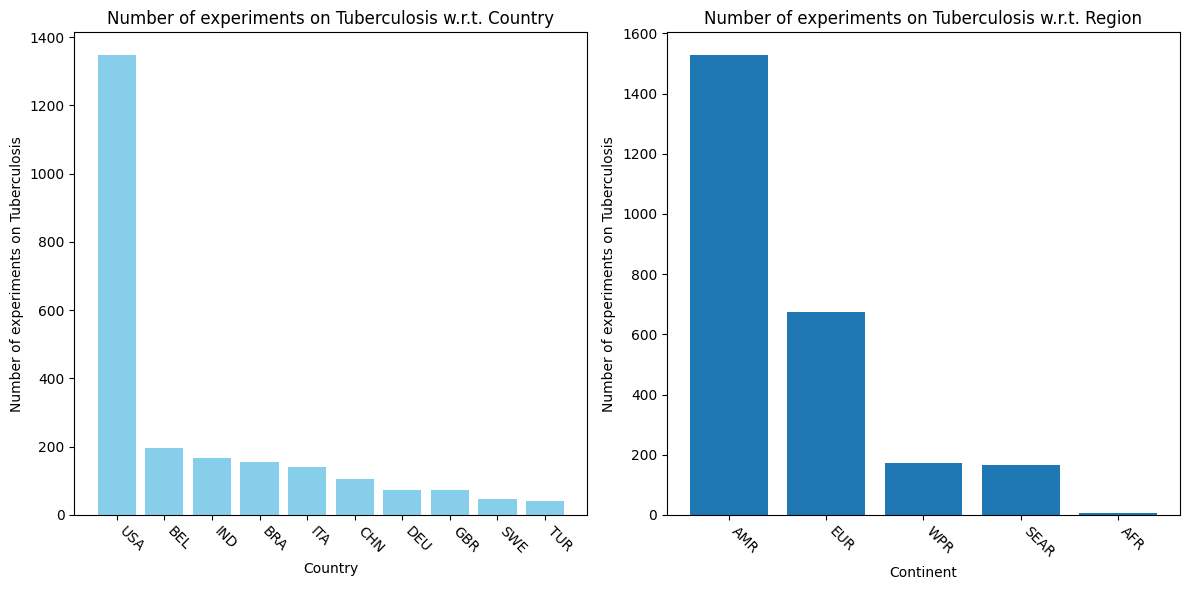

In [23]:
#Tuberculosis
plot_disease('Tuberculosis',dx, Tuberculosis_sources)

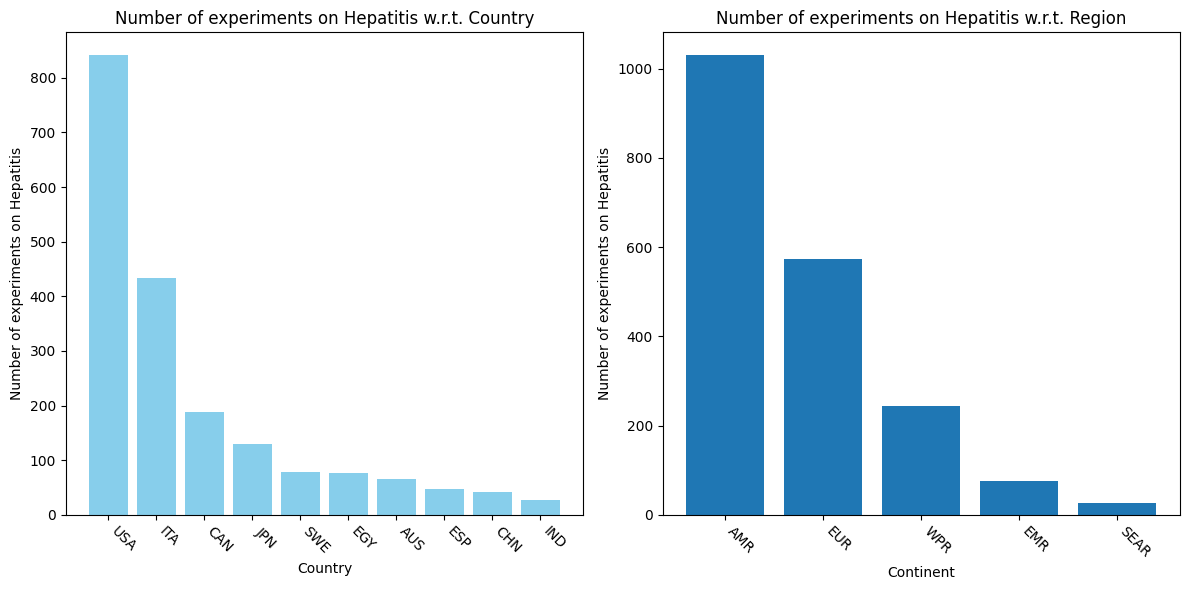

In [24]:
#Hepatitis
plot_disease('Hepatitis',dx, Hepatitis_C_sources)

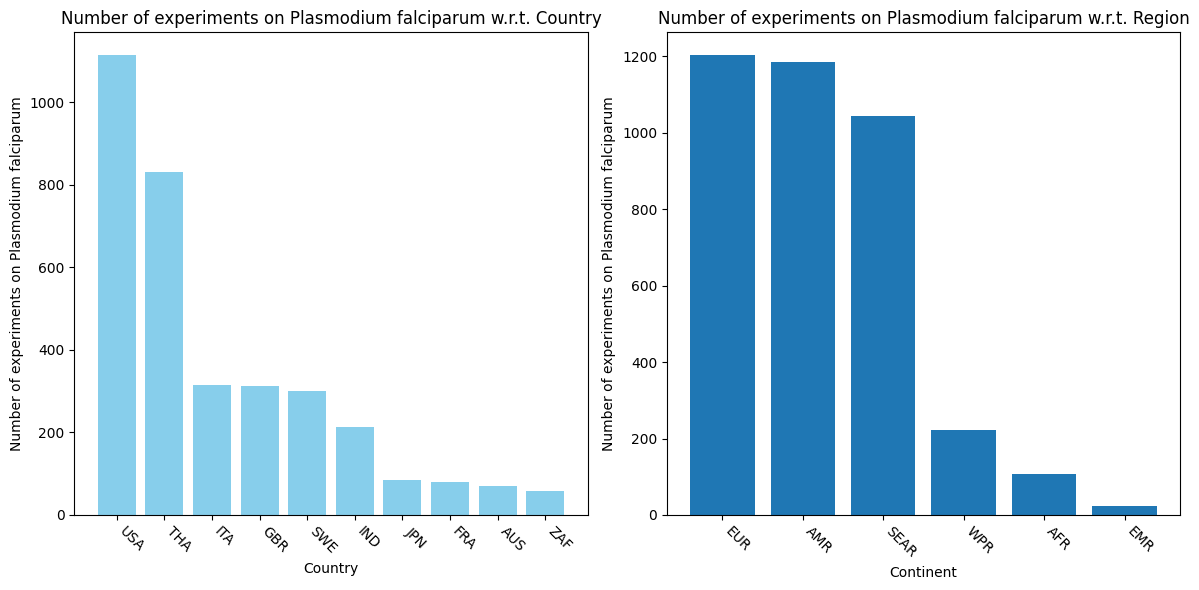

In [25]:
#Plasmodium_falciparum
plot_disease("Plasmodium falciparum",dx, Plasmodium_falciparum_sources)

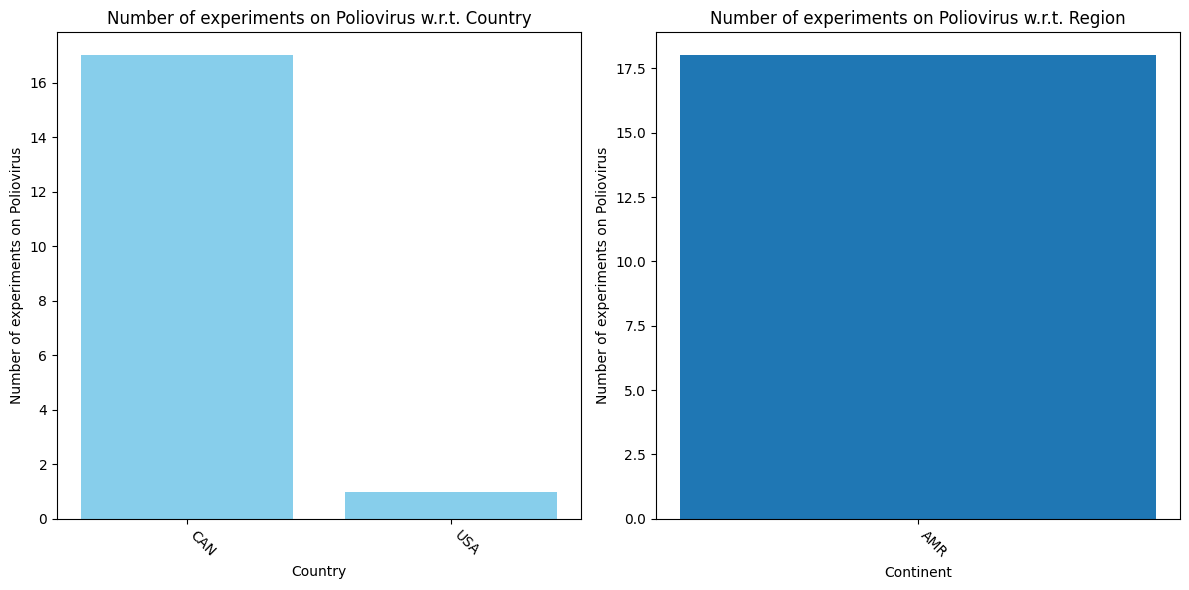

In [26]:
#Poliovirus
plot_disease("Poliovirus",dx, Poliovirus_sources)

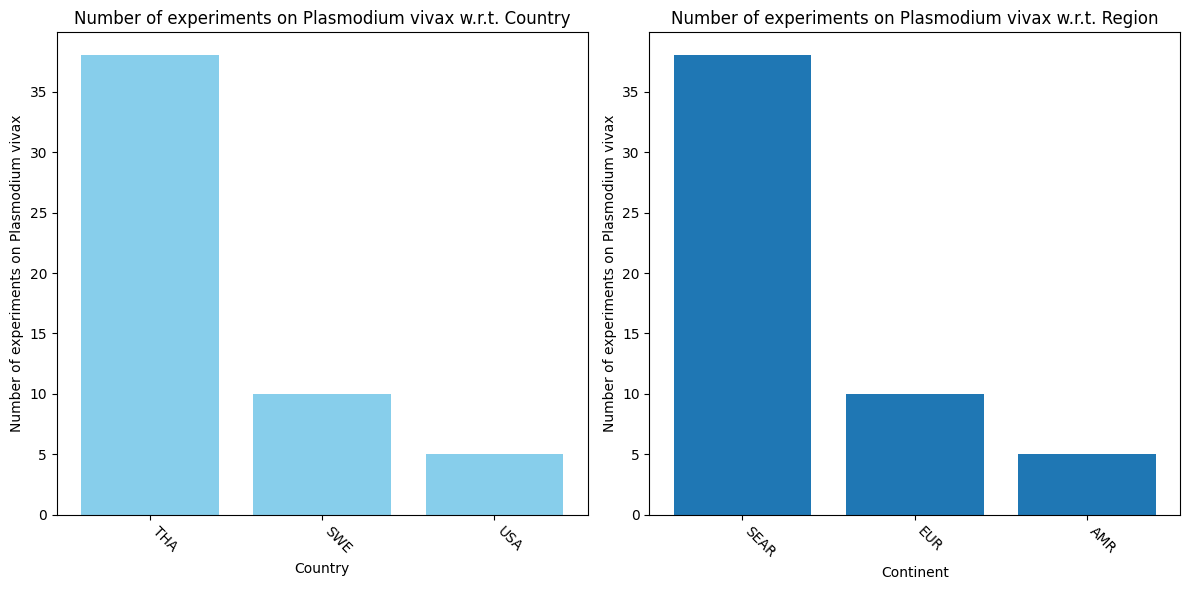

In [27]:
#Plasmodium_vivax
plot_disease("Plasmodium vivax",dx, Plasmodium_vivax_sources)

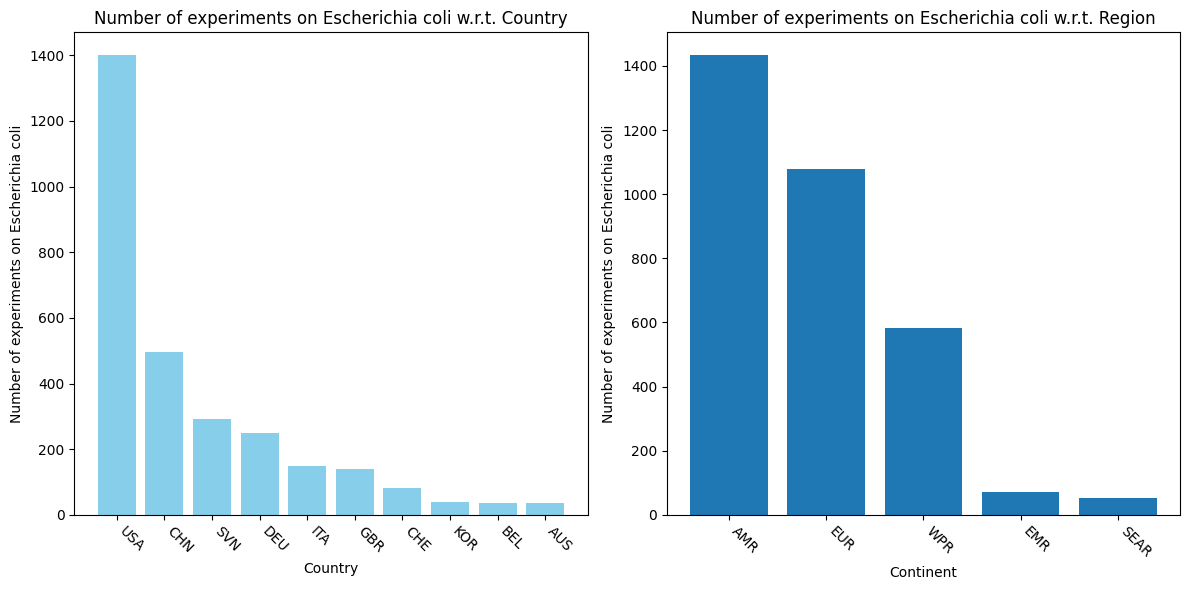

In [28]:
#Escherichia_coli
plot_disease("Escherichia coli",dx, Escherichia_coli_sources)

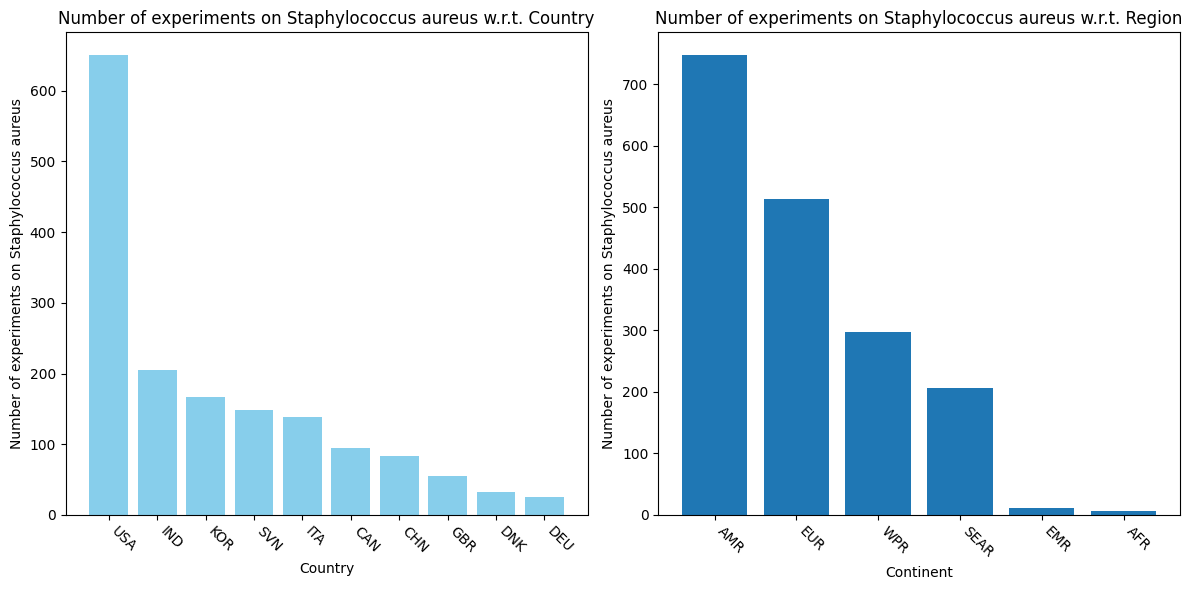

In [29]:
#Staphylococcus_aureus
plot_disease("Staphylococcus aureus",dx, Staphylococcus_aureus_sources)

In [30]:
plot_prevalence_wrt_research(dx)

In [31]:
# Occupies too much space but produces the map plot
get_map(get_cached_locations(dx))

### OLS Model

#### Disease Prevalence per Region

In [32]:
diseases_to_regions_df = df_regional_prevalence_for_each_disease()
diseases_to_regions_df = normalize_rows_of_df(diseases_to_regions_df)

#### Region-Region

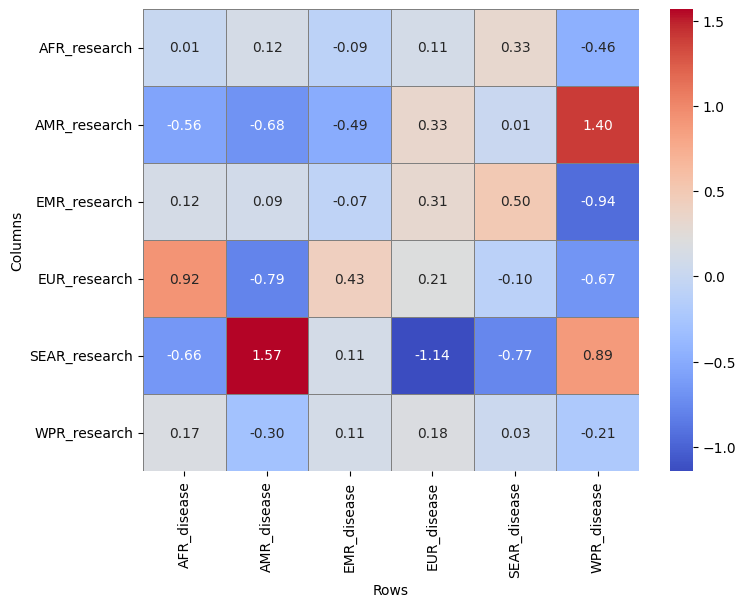

In [33]:
research_to_regions_df = research_of_diseases_per_region_df(dx)

dy = concatenate_disease_and_research_dfs(diseases_to_regions_df, research_to_regions_df)
coef_df, p_value_df = region_region_smf_model(dy)
region_region_heatmap(coef_df, p_value_df)

#### Country-Country

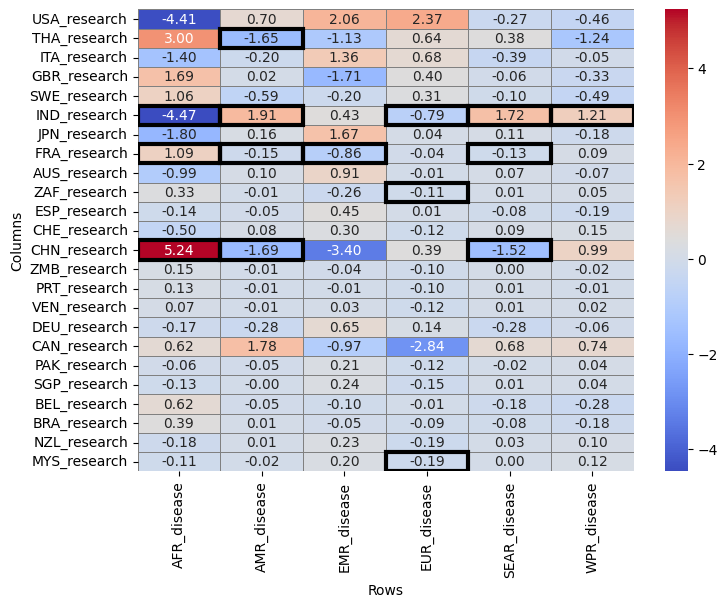

In [34]:
df_country = research_of_diseases_per_country_df(dx)

dz = concatenate_disease_and_research_dfs(research_to_regions_df, df_country)

search_string = '_research'
research_column_names = [col for col in dz.columns if search_string in col]
coef_df, p_value_df = region_country_smf_model(dz, research_column_names)
region_country_heatmap(coef_df, p_value_df)

# Likeness analysis

In [35]:
from src.utils.likeness import *
likable_drugs = df.loc[:, ['BindingDB Reactant_set_id', 'Ligand SMILES', 'BindingDB Ligand Name', 'Target Name']]

To evaluate whether the drug is 'likable' or not we will use three main criteria: Lipinski's Rule of Five, QED score and Verber criteria. 

##### **Lipinski's Rule of Five** 

Lipinski's Rule is a set of guidelines for assessing the potential oral bioavailability of a molecule based on its physicochemical properties According to these rules, a molecule is considered drug-like if it meets the following criteria:

- Molecular weight (MW) < 500 g/mol
- Log P (octanol-water partition coefficient) < 5
- Number of hydrogen bond donors ≤ 5
- Number of hydrogen bond acceptors ≤ 10

##### **Quantitative Estimate of Drug-likeness (QED)**

The QED score is a quantitative measure of drug-likeness that combines multiple physicochemical properties into a single score ranging from 0 to 1. Higher QED scores indicate greater drug-likeness. The properties considered in QED include:

- Molecular weight (MW)
- Log P (octanol-water partition coefficient)
- Number of hydrogen bond donors
- Number of hydrogen bond acceptors
- Rotatable bonds
- Polar surface area (PSA)

##### **Veber Criteria**

Veber's Rule is another guideline for evaluating the oral bioavailability of molecules, emphasizing flexibility and surface area. According to Veber criteria, a molecule is considered drug-like if it meets the following conditions:

- Rotatable bonds: ≤ 10
- Polar Surface Area (PSA): ≤ 140 Å²

In [ ]:
"""
Don't run, takes a while

"""
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

likable_drugs = calculate_drug_properties(likable_drugs)
likable_drugs.head()

In [36]:
likable_drugs= pd.read_csv('likable_drugs_dataset.csv')

In [37]:
nan_qed_smiles = likable_drugs[likable_drugs["QED Score"].isna()]["Ligand SMILES"]

print("SMILES strings with NaN QED Score:")
print(nan_qed_smiles)

SMILES strings with NaN QED Score:
14035      CN[C@@H](C)C(=O)N[C@H]1CN(CC[C@H]2CC[C@H](N2C1...
14160      CN[C@@H](C)C(=O)N[C@H]1CN(CC[C@H]2CC[C@H](N2C1...
15810      CC(C)(C)OC(=O)N1CC(=O)N(C(=O)C1)c1ccc(cc1)N1CC...
36001      CSc1ccc(cc1)C1=C(C=C[N]([O-])=C1)[C@@H]1CCC(F)...
36012      CSc1ccc(cc1)C1=C(C=C[N]([O-])=C1)[C@@H]1CCC(F)...
                                 ...                        
1629667    Oc1ccc(cc1)[B]1234[B]567[B]89%10[B]%11%12%13[B...
1629668    Oc1ccc(cc1)[C]1234[B]567[B]89%10[B]55%11[B]88%...
1629669    Oc1ccc(cc1)[C]1234[B]567[B]89%10[B]%11%12%13[B...
2369979    CC(C)C[C@H](NC(=O)[C@H](CC[C]1234B5B6B5[B--]11...
2792092    Clc1ccc(cc1)S(=O)(=O)c1ccc(NC(=O)NCC2=CN[H]=C2...
Name: Ligand SMILES, Length: 3038, dtype: object


We have identified over 3000 NaN QED scores in our dataset. A potential reason for this could be the presence of invalid SMILES strings, which may also be causing issues in extracting drug properties for these observations. Let’s investigate this further.

In [38]:
validity_df = check_smiles_validity(nan_qed_smiles)

In [39]:
print(validity_df)
print('Count Invalid SMILES: ', validity_df[validity_df['Valid'] == False]['Valid'].count())

                                                 SMILES  Valid
0     CN[C@@H](C)C(=O)N[C@H]1CN(CC[C@H]2CC[C@H](N2C1...  False
1     CN[C@@H](C)C(=O)N[C@H]1CN(CC[C@H]2CC[C@H](N2C1...  False
2     CC(C)(C)OC(=O)N1CC(=O)N(C(=O)C1)c1ccc(cc1)N1CC...  False
3     CSc1ccc(cc1)C1=C(C=C[N]([O-])=C1)[C@@H]1CCC(F)...  False
4     CSc1ccc(cc1)C1=C(C=C[N]([O-])=C1)[C@@H]1CCC(F)...  False
...                                                 ...    ...
3033  Oc1ccc(cc1)[B]1234[B]567[B]89%10[B]%11%12%13[B...  False
3034  Oc1ccc(cc1)[C]1234[B]567[B]89%10[B]55%11[B]88%...  False
3035  Oc1ccc(cc1)[C]1234[B]567[B]89%10[B]%11%12%13[B...  False
3036  CC(C)C[C@H](NC(=O)[C@H](CC[C]1234B5B6B5[B--]11...  False
3037  Clc1ccc(cc1)S(=O)(=O)c1ccc(NC(=O)NCC2=CN[H]=C2...  False

[3038 rows x 2 columns]
Count Invalid SMILES:  3038


Our hypothesis was confirmed, and we identified invalid SMILES as the cause. Therefore, we will exclude these invalid SMILES from further analysis.

In [40]:
likable_drugs.dropna(inplace=True)
likable_drugs.isna().sum()

Unnamed: 0                   0
BindingDB Reactant_set_id    0
Ligand SMILES                0
BindingDB Ligand Name        0
Target Name                  0
Molecular Weight             0
Log P                        0
H Donors                     0
H Acceptors                  0
Rotatable Bonds              0
PSA                          0
QED Score                    0
Lipinski Pass                0
Veber Pass                   0
dtype: int64

In [41]:
#Calculation of important quantiles in QED 
qed_values = likable_drugs.dropna(subset="QED Score")["QED Score"].values
q75, q90, q95 = np.percentile(qed_values, [75, 90, 95])

In [42]:
count_q75 = len(likable_drugs[(likable_drugs["Lipinski Pass"] == True) & 
                              (likable_drugs["Veber Pass"] == True) & 
                              (likable_drugs["QED Score"] >= q75)])

count_q90 = len(likable_drugs[(likable_drugs["Lipinski Pass"] == True) & 
                              (likable_drugs["Veber Pass"] == True) & 
                              (likable_drugs["QED Score"] >= q90)])

count_q95 = len(likable_drugs[(likable_drugs["Lipinski Pass"] == True) & 
                              (likable_drugs["Veber Pass"] == True) & 
                              (likable_drugs["QED Score"] >= q95)])

print(f"Number of observations over 75th percentile: {count_q75} out of {len(qed_values)}")
print(f"Number of observations over 90th percentile: {count_q90} out of {len(qed_values)}")
print(f"Number of observations over 95th percentile: {count_q95} out of {len(qed_values)}")

Number of observations over 75th percentile: 711735 out of 2910002
Number of observations over 90th percentile: 289274 out of 2910002
Number of observations over 95th percentile: 145396 out of 2910002


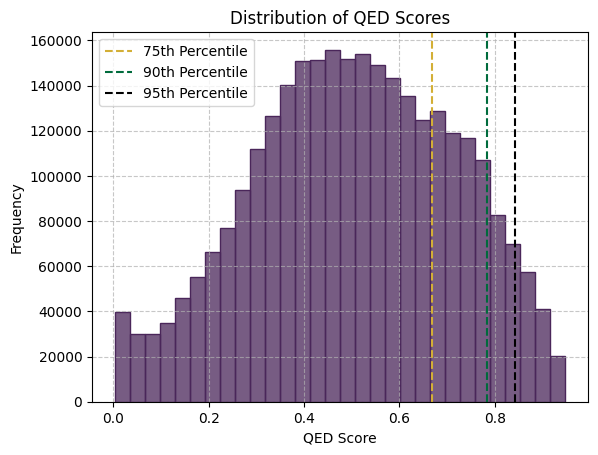

In [43]:
custom_palette = ["#006B3C", "#D3AF36", "#CD9B06", "#682861", "#4A265A"]
sns.histplot(qed_values, bins=30, color=custom_palette[4], edgecolor=custom_palette[4])
plt.axvline(q75, color=custom_palette[1], linestyle='--', label='75th Percentile')
plt.axvline(q90, color=custom_palette[0], linestyle='--', label='90th Percentile')
plt.axvline(q95, color='black', linestyle='--', label='95th Percentile')

plt.title("Distribution of QED Scores")
plt.xlabel("QED Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

The histogram shows that most compounds have QED scores between 0.4 and 0.8, with a peak around 0.6, indicating moderate drug-likeness for the majority. Only the top 25% have scores above 0.668, the top 10% above 0.785, and the top 5% exceed 0.842. Compounds above 0.7 are generally considered highly drug-like and may be prioritized for further study.

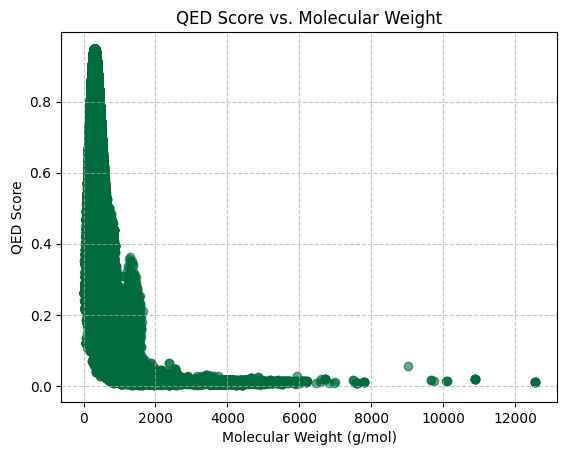

In [44]:
molecular_weights = likable_drugs["Molecular Weight"].values

plt.scatter(molecular_weights, qed_values, alpha=0.6, color=custom_palette[0])
plt.title("QED Score vs. Molecular Weight")
plt.xlabel("Molecular Weight (g/mol)")
plt.ylabel("QED Score")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

We observe that compounds with lower molecular weights tend to have higher QED scores, with scores dropping sharply as molecular weight increases. Compounds with molecular weights above 1,000 g/mol generally have very low QED scores, suggesting that higher molecular weight compounds are less drug-like. 

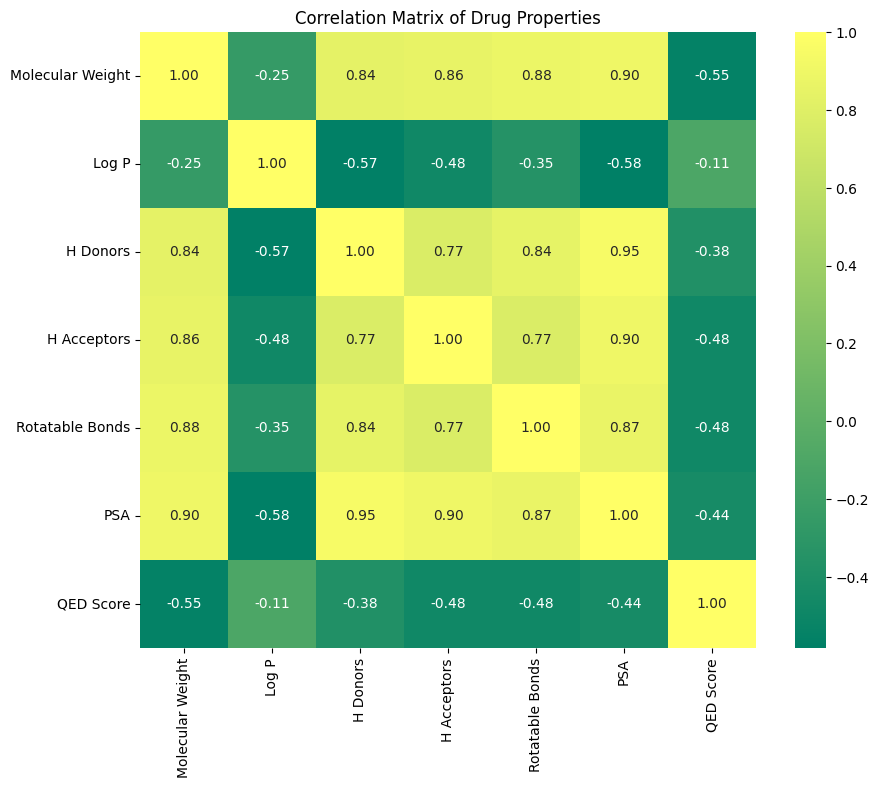

In [45]:
properties = ['Molecular Weight', 'Log P', 'H Donors', 'H Acceptors', 'Rotatable Bonds', 'PSA', 'QED Score']
correlation_matrix = likable_drugs[properties].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='summer', fmt=".2f", square=True)
plt.title("Correlation Matrix of Drug Properties")
plt.show()

The heatmap shows that larger molecules (higher molecular weight) with more rotatable bonds, hydrogen bond donors, and acceptors tend to have lower QED scores, indicating they are less drug-like. QED scores are negatively correlated with molecular weight and polar surface area (PSA), suggesting that smaller, less polar compounds are generally more favorable for drug-likeness. Additionally, lipophilic compounds (higher Log P) tend to have fewer polar groups and less flexibility.

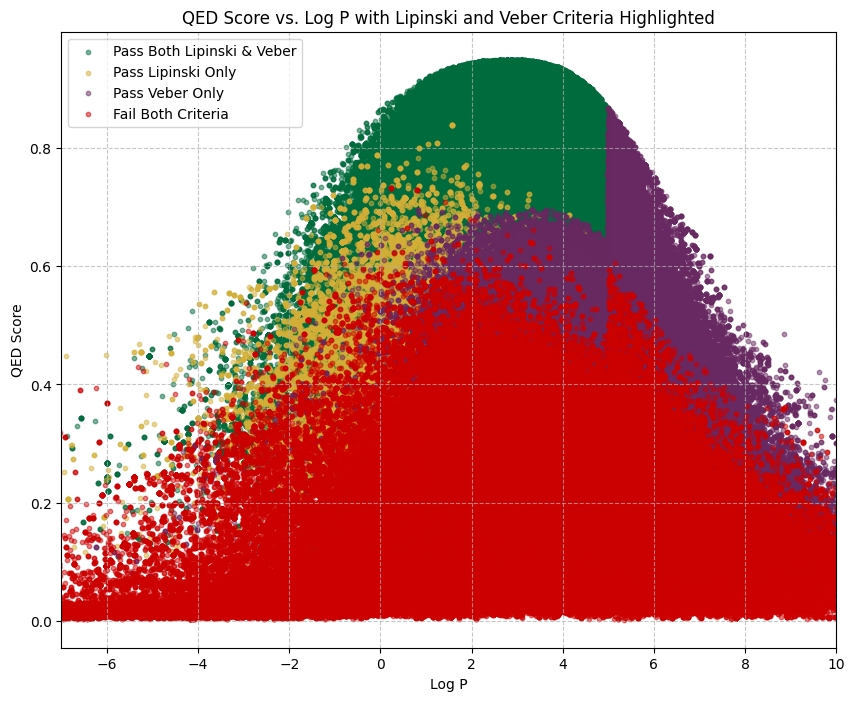

In [46]:
likable_drugs['Color'] = 'red'
likable_drugs.loc[(likable_drugs['Lipinski Pass'] == True) & (likable_drugs['Veber Pass'] == True), 'Color'] = 'green'
likable_drugs.loc[(likable_drugs['Lipinski Pass'] == True) & (likable_drugs['Veber Pass'] == False), 'Color'] = 'blue'
likable_drugs.loc[(likable_drugs['Lipinski Pass'] == False) & (likable_drugs['Veber Pass'] == True), 'Color'] = 'purple'

custom_palette = {
    'green': '#006B3C',  # Pass Both Lipinski & Veber
    'blue': '#D3AF36',   # Pass Lipinski Only
    'purple': '#682861', # Pass Veber Only
    'red': '#CC0000'     # Fail Both Criteria
}

plt.figure(figsize=(10, 8))
for color, hex_color in custom_palette.items():
    subset = likable_drugs[likable_drugs['Color'] == color]
    label = ''
    if color == 'green':
        label = 'Pass Both Lipinski & Veber'
    elif color == 'blue':
        label = 'Pass Lipinski Only'
    elif color == 'purple':
        label = 'Pass Veber Only'
    elif color == 'red':
        label = 'Fail Both Criteria'
    plt.scatter(subset['Log P'], subset['QED Score'], c=hex_color, label=label, alpha=0.5, s=10)

plt.xlim(-7, 10)
plt.xlabel("Log P")
plt.ylabel("QED Score")
plt.title("QED Score vs. Log P with Lipinski and Veber Criteria Highlighted")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

The plot shows that compounds with moderate Log P values (around 0 to 5) tend to have higher QED scores, indicating a balance between lipophilicity and drug-likeness. Compounds that pass both Lipinski and Veber criteria (green points) are clustered in this favorable range, with QED scores often above 0.6, suggesting they are more drug-like. In contrast, compounds that fail both criteria (red points) generally have lower QED scores and are spread across both high and low Log P values. This suggests that extreme lipophilicity or hydrophilicity is less favorable for drug-likeness.

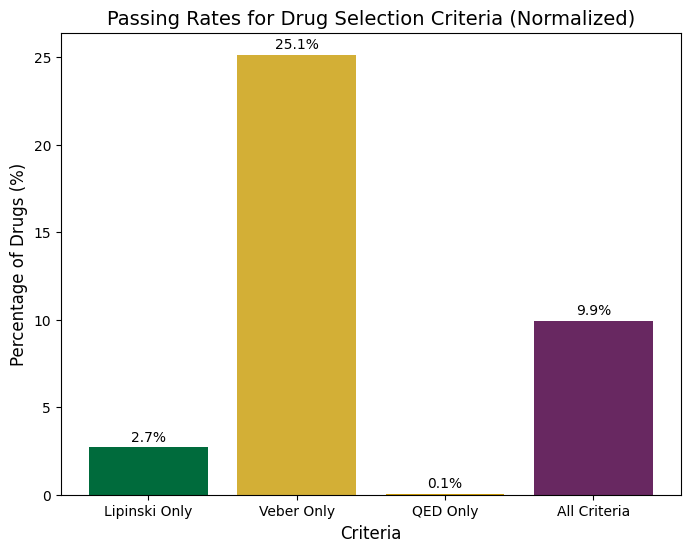

In [47]:
total_drugs = len(likable_drugs)
lipinski_pass = likable_drugs[(likable_drugs["Lipinski Pass"] == True)]
veber_pass = likable_drugs[(likable_drugs["Veber Pass"] == True)]
qed_pass = likable_drugs[(likable_drugs["QED Score"] >= q90)]

lipinski_only = len(lipinski_pass) - len(lipinski_pass[lipinski_pass["Veber Pass"] == True])
veber_only = len(veber_pass) - len(veber_pass[veber_pass["Lipinski Pass"] == True])
all_criteria = len(lipinski_pass[(lipinski_pass["Veber Pass"] == True) & 
                                 (lipinski_pass["QED Score"] >= likable_drugs["QED Score"].quantile(0.9))])
qed_only = len(qed_pass) - all_criteria

data = {
    'Criteria': ['Lipinski Only', 'Veber Only', 'QED Only', 'All Criteria'],
    'Counts': [lipinski_only, veber_only, qed_only, all_criteria]
}

df = pd.DataFrame(data)
df['Percentage'] = (df['Counts'] / total_drugs) * 100

criteria = df['Criteria']
percentages = df['Percentage']

plt.figure(figsize=(8, 6))
bars = plt.bar(criteria, percentages, color=['#006B3C', '#D3AF36', '#CD9B06', '#682861'])

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.2, 
             f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.title("Passing Rates for Drug Selection Criteria (Normalized)", fontsize=14)
plt.xlabel("Criteria", fontsize=12)
plt.ylabel("Percentage of Drugs (%)", fontsize=12)

plt.show()

This bar chart displays the percentage of drugs that satisfy various selection criteria, revealing important insights into drug-likeness assessments.  

- Notably, a significant 25.1% of drugs pass only the Veber Criteria, which suggests that while flexibility and surface area are common characteristics.
- Only 2.7% and a mere 0.1% of drugs meet the Lipinski Rule and QED Score criteria alone, respectively, indicating these criteria are more stringent or less commonly satisfied on their own. 
- The fact that just 9.9% of drugs meet all three criteria underscores the complexity and difficulty of developing drugs that are optimally balanced across multiple pharmacological parameters.

Now we would focus on most 'likable' drugs (that pass all criteria).

In [48]:
most_likable_drugs = likable_drugs[(likable_drugs["Lipinski Pass"] == True) & 
                              (likable_drugs["Veber Pass"] == True) & 
                              (likable_drugs["QED Score"] >= q90)].copy()
most_likable_drugs.drop(columns='Unnamed: 0', inplace=True)
most_likable_drugs.head()

,BindingDB Reactant_set_id,Ligand SMILES,BindingDB Ligand Name,Target Name,Molecular Weight,Log P,H Donors,H Acceptors,Rotatable Bonds,PSA,QED Score,Lipinski Pass,Veber Pass,Color
78,79,CCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](Cc...,"(4R,5S,6S,7R)-4,7-dibenzyl-1,3-diethyl-5,6-dih...",Dimer of Gag-Pol polyprotein [501-599],382.504,2.7082,2.0,3.0,6.0,64.01,0.807442,True,True,green
822,822,Oc1c2CCCCCCc2oc(=O)c1C(C1CC1)c1ccccc1,"3-[cyclopropyl(phenyl)methyl]-4-hydroxy-2H,5H,...",Dimer of Gag-Pol polyprotein [489-587],324.420,4.5463,1.0,3.0,3.0,50.44,0.901086,True,True,green
864,864,CC(c1ccccc1)c1c(O)c2CCCCCCc2oc1=O,"4-hydroxy-3-(1-phenylethyl)-2H,5H,6H,7H,8H,9H,...",Dimer of Gag-Pol polyprotein [489-587],298.382,4.1562,1.0,3.0,2.0,50.44,0.905516,True,True,green
865,865,CCC(c1ccccc1)c1c(O)c2CCCCCCc2oc1=O,"4-hydroxy-3-(1-phenylpropyl)-2H,5H,6H,7H,8H,9H...",Dimer of Gag-Pol polyprotein [489-587],312.409,4.5463,1.0,3.0,3.0,50.44,0.904479,True,True,green
866,866,CCCC(c1ccccc1)c1c(O)c2CCCCCCc2oc1=O,"4-hydroxy-3-(1-phenylbutyl)-2H,5H,6H,7H,8H,9H,...",Dimer of Gag-Pol polyprotein [489-587],326.436,4.9364,1.0,3.0,4.0,50.44,0.865815,True,True,green


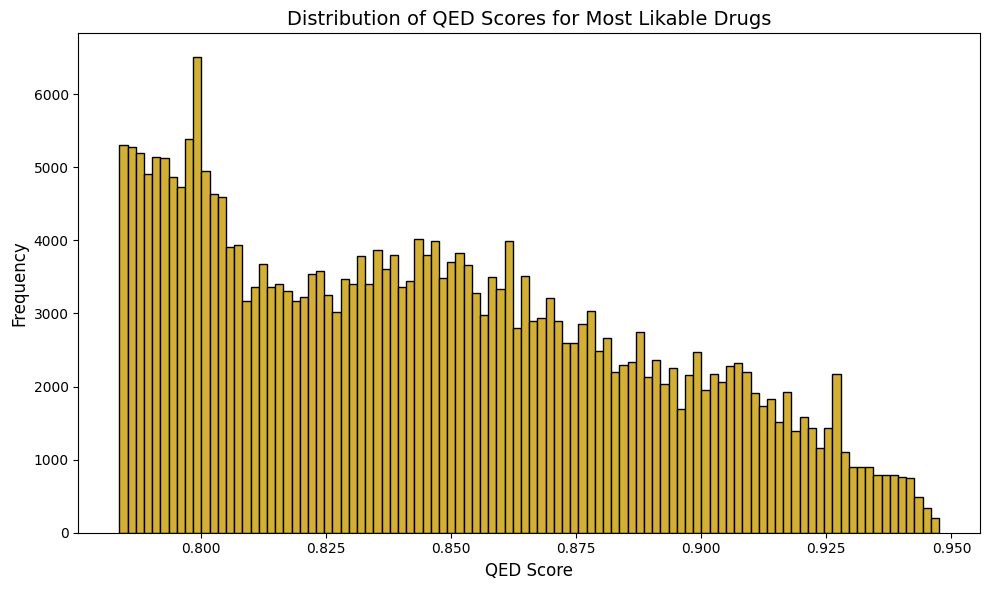

In [49]:
hist_data, bin_edges = np.histogram(most_likable_drugs["QED Score"], bins=100)

plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_data, width=(bin_edges[1] - bin_edges[0]), color="#D3AF36", edgecolor='black')
plt.title("Distribution of QED Scores for Most Likable Drugs", fontsize=14)
plt.xlabel("QED Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

This histogram shows the QED scores of the most likable drugs. Most drugs have scores between 0.8 and 0.85, meaning they are highly drug-like. The number of drugs drops as the QED score goes above 0.9, showing fewer highly optimized drugs.

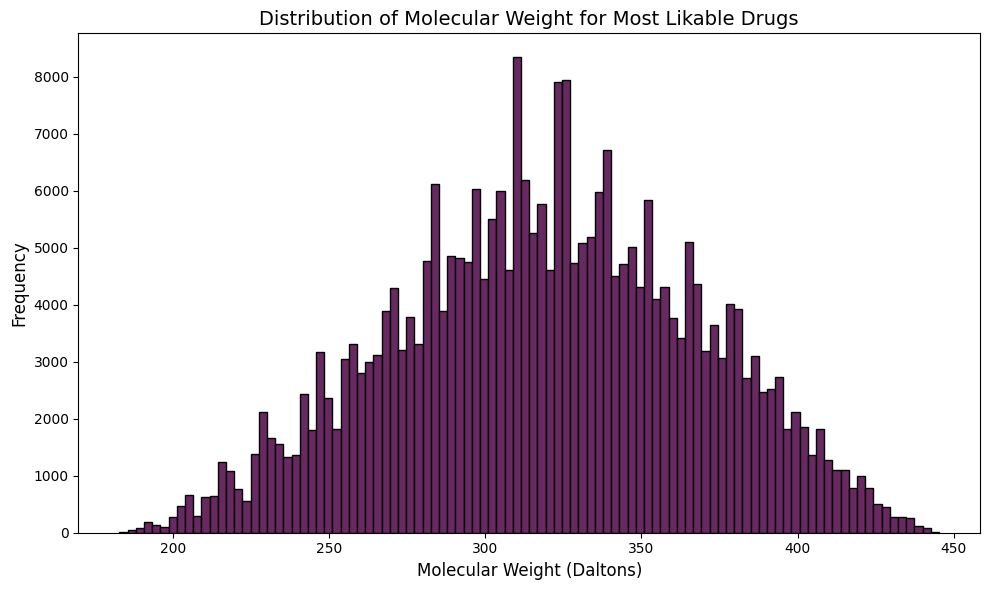

In [50]:
hist_data, bin_edges = np.histogram(most_likable_drugs["Molecular Weight"], bins=100)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_data, width=(bin_edges[1] - bin_edges[0]), color="#682861", edgecolor='black')

# Add labels and title
plt.title("Distribution of Molecular Weight for Most Likable Drugs", fontsize=14)
plt.xlabel("Molecular Weight (Daltons)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The majority of drugs have molecular weights between 250 and 350 Daltons, with a peak around 300. Fewer drugs are observed at the extreme ends of the weight range, indicating that most likable drugs tend to have moderate molecular weights.

## DDI Prediction

In [92]:
from src.utils.geo_utils import *
from src.utils.script import *
from src.utils.continents import *
from src.utils.who_data_handling import *
df = load_data()

In [ ]:
import numpy as np
import pandas as pd
from src.utils.ddi import *
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from rdkit.Chem import Draw, AllChem
from rdkit import Chem
import torch.nn as nn
import torch.optim as optim
from torchview import draw_graph
from PIL import Image
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
from wordcloud import WordCloud
from src.utils.likeness import *

In [ ]:
file_path = 'data/drugbank/drugbank.xml'
ddi = process_drugbank_to_dataframe(file_path)
ddi = ddi.reset_index()

In [106]:
file_path = 'data/drugbank/drugbank.xml'
db_smiles = extract_smiles_from_drugbank(file_path)
db_smiles = db_smiles.reset_index()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

embeddings = get_biobert_embeddings(ddi, device)

In [ ]:
n_clusters = 3 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

In [ ]:
interaction_types = {0: "major", 1: "moderate", 2: "minor"} 

In [ ]:
ddi['labels'] = labels
ddi['label_meaning'] = [interaction_types[i] for i in labels]
ddi.drop(columns=['primary_description'], inplace=True, errors='ignore')

In [ ]:
ddi.head()

In [ ]:
# Drop duplicated pairs
print(f'Shape before removing duplicates: {ddi.shape}')
ddi[['primary_id', 'interacting_drug_id']] = ddi.apply(lambda x: sorted([x['primary_id'], x['interacting_drug_id']]), axis=1, result_type='expand')
ddi.drop_duplicates(subset=['primary_id', 'interacting_drug_id'], inplace=True)
print(f'Shape after removing duplicates: {ddi.shape}')

In [ ]:
label_counts = ddi['label_meaning'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(label_counts.index, label_counts, color='#aad7d4')
plt.title('Label Counts', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


One may notice that the dataset is inbalanced so when we do the train-validation-test split we apply stratigy sampling

In [ ]:
grouped = ddi.groupby('label_meaning')['interaction_description'].apply(lambda x: ' '.join(x)).reset_index()

def generate_word_cloud(text, label):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

for index, row in grouped.iterrows():
    label = row['label_meaning']
    text = row['interaction_description']
    generate_word_cloud(text, label)

In [6]:
db_smiles.drop(columns=['index'], inplace=True, errors='ignore')
db_smiles.rename(columns={'DrugBank ID': 'primary_id', 'SMILES': 'primary_smiles'}, inplace=True)
ddi = pd.merge(ddi, db_smiles, how='left', on='primary_id')
db_smiles.rename(columns={'primary_id': 'interacting_drug_id', 'primary_smiles': 'interaction_drug_smiles'}, inplace=True)
ddi = pd.merge(ddi, db_smiles, how='left', on='interacting_drug_id')
ddi.dropna(inplace=True) # There are those drugs that do not contain SMILES

In [ ]:
# Remove rows with invalid SMILES
primary_isvalid = check_smiles_validity(ddi['primary_smiles'].unique())
interaction_drug_isvalid = check_smiles_validity(ddi['interaction_drug_smiles'].unique())
primary_isvalid.rename(columns={'SMILES': 'primary_smiles', 'Valid': 'primary_isvalid'}, inplace=True)
interaction_drug_isvalid.rename(columns={'SMILES': 'interaction_drug_smiles', 'Valid': 'interaction_drug_isvalid'}, inplace=True)
ddi = pd.merge(ddi, primary_isvalid, how='left', on='primary_smiles')
ddi = pd.merge(ddi, interaction_drug_isvalid, how='left', on='interaction_drug_smiles')
ddi = ddi[(ddi['primary_isvalid'] == True) & (ddi['interaction_drug_isvalid'] == True)]
print(f'Final shape: {ddi.shape}')

In [8]:
ddi.drop(columns=['primary_isvalid', 'interaction_drug_isvalid'], inplace=True, errors='ignore')

In [ ]:
smile = ddi.iloc[0]['primary_smiles']
m = Chem.MolFromSmiles(smile)
img = Draw.MolToImage(m, size=(1000, 1000))
img

In [ ]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

primary_fingerprint_df = create_fingerprints(ddi['primary_smiles'].unique(), 'primary')
interaction_drug_fingerprint_df = create_fingerprints(ddi['interaction_drug_smiles'].unique(), 'interaction_drug')

In [ ]:
smile = ddi.iloc[0]['primary_smiles']
mol = Chem.MolFromSmiles(smile)
bi1 = {}
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bi1)
print(len(list(fp1.GetOnBits())))
tpls1 = [(mol, x, bi1) for x in fp1.GetOnBits()]
Draw.DrawMorganBits(tpls1[:], molsPerRow=8, legends=[str(x) for x in fp1.GetOnBits()][:])

In [ ]:
ddi = pd.merge(ddi, primary_fingerprint_df, how='left', on='primary_smiles')
ddi = pd.merge(ddi, interaction_drug_fingerprint_df, how='left', on='interaction_drug_smiles')
ddi.head()

In [13]:
class DrugInteractionModel(nn.Module):
    def __init__(self):
        super(DrugInteractionModel, self).__init__()
        
        # Encoder of each fingerprint
        self.encoder = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )
        
        # Merging Layer + Classifier
        self.fc_merge = nn.Sequential(
            nn.Linear(256 * 2, 128),
            nn.ReLU(),
            nn.Linear(128, 3),
        )

    def forward(self, drug1, drug2):
        encoded_drug1 = self.encoder(drug1)
        encoded_drug2 = self.encoder(drug2)
        merged = torch.cat((encoded_drug1, encoded_drug2), dim=1)
        out = self.fc_merge(merged)
        return out

In [ ]:
dummy_model = DrugInteractionModel()
dummy_input_1 = torch.randn(1, 1024)
dummy_input_2 = torch.randn(1, 1024)

model_graph = draw_graph(
    dummy_model,
    input_data=(dummy_input_1, dummy_input_2),
    expand_nested=True,
    save_graph=True,
    filename="drug_interaction_model", 
    directory="./",
)

image = Image.open("drug_interaction_model.png")
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
ddi.shape

In [22]:
train_loader, val_loader, test_loader = get_loaders(ddi)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DrugInteractionModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100

model, train_losses, val_accuracies, early_end_epoch = train_model(model, optimizer, criterion, num_epochs, train_loader, val_loader, device)
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss', color='tab:red')
ax1.plot(range(1, min(early_end_epoch + 2, num_epochs + 1)), train_losses, marker='o', linestyle='-', color='tab:red', label='Train Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Validation Accuracy (%)', color='tab:blue')
ax2.plot(range(1, min(early_end_epoch + 2, num_epochs + 1)), val_accuracies, marker='s', linestyle='--', color='tab:blue', label='Val Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:blue')
fig.tight_layout()
fig.suptitle('Train Loss and Validation Accuracy', y=1.05)
plt.show()

We run the training util it reaches convergence in training loss. We also evaluate the model at each step to see it's process in training and it's improvement in performance

In [ ]:
model.eval()
test_loss = 0
correct = 0
total = 0

all_labels = []
all_predictions = []

with torch.no_grad():
    for batch_X1, batch_X2, batch_y in test_loader:
        batch_X1, batch_X2, batch_y = batch_X1.to(device), batch_X2.to(device), batch_y.to(device)
        outputs = model(batch_X1, batch_X2)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

        all_labels.extend(batch_y.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
test_accuracy = 100 * correct / total
print(f"Test Loss: {test_loss / len(test_loader):.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
color_palette = ['#CD9B06', '#682861']
cm = confusion_matrix(all_labels, all_predictions, labels=[0, 1, 2])

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,  # Display the numbers in the cells
    fmt='d',  # Integer formatting
    cmap=sns.color_palette(color_palette, as_cmap=True),  # Apply the custom color palette
    xticklabels=['Class 0', 'Class 1', 'Class 2'],  # Replace with your class names
    yticklabels=['Class 0', 'Class 1', 'Class 2']
)

# Add labels and title
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()